# Whidbey Island 

## Server Setup

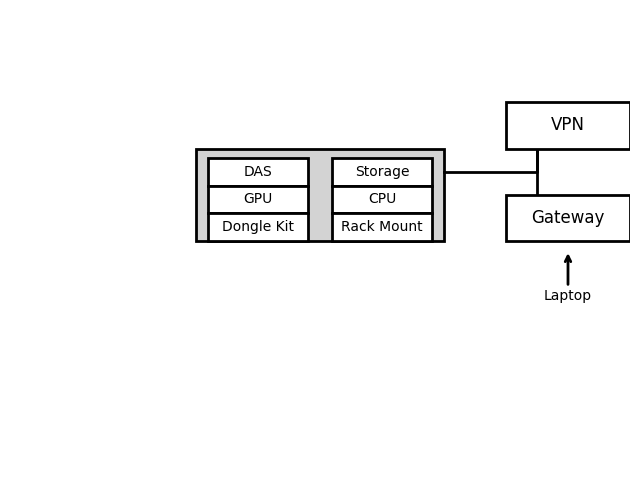

In [4]:
# Diagram of the experimental setup
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython.display import HTML, display

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Set axis limits and turn off axis
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# Add the main box "Exp"
exp_box = patches.Rectangle((3, 5), 4, 2, edgecolor='black', facecolor='lightgrey', lw=2)
ax.add_patch(exp_box)

# Add smaller boxes inside "Exp" with better spacing and borders
small_box_positions = [(3.2, 6.2, 1.6, 0.6), (5.2, 6.2, 1.6, 0.6), (3.2, 5.6, 1.6, 0.6), (5.2, 5.6, 1.6, 0.6), 
                       (3.2, 5, 1.6, 0.6), (5.2, 5, 1.6, 0.6)]  # Adjusted for spacing
box_labels = ['DAS', 'Storage', 'GPU', 'CPU', 'Dongle Kit', 'Rack Mount']
for (x, y, w, h), label in zip(small_box_positions, box_labels):
    box = patches.Rectangle((x, y), w, h, edgecolor='black', facecolor='white', lw=2)
    ax.add_patch(box)
    ax.text(x + w/2, y + h/2, label, ha='center', va='center', fontsize=10)

# Draw the line between VPN and Gateway as the lowest layer
center_x = 8.5  # Center between the two boxes
ax.plot([center_x, center_x], [7, 5.5], color='black', lw=2, zorder=1)  # Line from VPN to Gateway

# Draw continuous line from Exp to VPN and Gateway, with no breaks
ax.plot([7, center_x, center_x], [6.5, 6.5, 7], color='black', lw=2, zorder=2)  # Line from Exp to VPN

# Add the VPN and Gateway boxes with white background
vpn_box = patches.Rectangle((8, 7), 2, 1, edgecolor='black', facecolor='white', lw=2, zorder=3)
ax.add_patch(vpn_box)
ax.text(9, 7.5, 'VPN', ha='center', va='center', fontsize=12, zorder=4)

gateway_box = patches.Rectangle((8, 5), 2, 1, edgecolor='black', facecolor='white', lw=2, zorder=3)
ax.add_patch(gateway_box)
ax.text(9, 5.5, 'Gateway', ha='center', va='center', fontsize=12, zorder=4)

# Add line from Gateway to Laptop
ax.annotate('', xy=(9, 4.8), xytext=(9, 4),
            arrowprops=dict(arrowstyle='->', lw=2), zorder=5)
ax.text(9, 3.8, 'Laptop', ha='center', va='center', fontsize=10, zorder=5)

# Display the diagram
plt.show()



## DAS

## Benchmark Testing

## CPU

### Intel Xeon D-2776NT
Your system is running an Intel Xeon D-2776NT CPU, which is a high-performance, server-grade processor designed for tasks that require robust processing power. Here are the key details and what they imply for your DAS setup:

1. CPU Specifications:
- Architecture: x86_64 (64-bit capable)
Cores and Threads:
- 32 CPU(s): This includes 16 physical cores with 2 threads per core (Hyper-Threading enabled), giving you 32 logical processors.
- Clock Speed: 2.10 GHz base frequency.
L1, L2, and L3 Cache:
- L1 Cache: 768 KiB (L1d) + 512 KiB (L1i)
- L2 Cache: 20 MiB total across all cores.
- L3 Cache: 25 MiB shared across all cores.
Virtualization Support: 
- VT-x, which is beneficial if you're running virtual machines.
2. Performance Implications:
- Multithreading: With 32 logical processors, this CPU is well-suited for multi-threaded tasks, such as data processing, which is typical in DAS applications.
- Cache Sizes: The large L2 and L3 caches will help with data-intensive operations, especially if you’re processing large datasets in real-time.
- Clock Speed: At 2.10 GHz, it’s optimized for stable, consistent performance, rather than extreme single-threaded speed. This is typical for server workloads where reliability over extended periods is critical.
3. Expected Performance for DAS Processing:
Given the specifications:
- Batch Processing: The CPU should handle batch processing of DAS data quite well, especially with multi-threading. It will be effective in handling parallel tasks, such as processing different segments of data simultaneously.
- Real-Time Processing: The CPU can manage real-time data streams, but depending on the data rate, it might be on the edge of what's optimal, especially without a GPU to offload some of the more computationally intense operations like data compression or complex signal processing.
- Virtualization: If you're running multiple virtual machines or containers (e.g., one for data collection, another for processing), this CPU has the capabilities to handle those tasks efficiently.


## Storage


RAID6 is being built on the QNAP TL-D800C by the CPU (operator@D-10-158-15-21) to eventually network mount the storage - similar to the Alaska setup.The host system’s CPU handles the RAID calculations, management, and synchronization. Since you're using an Intel Xeon D-2776NT, it’s well-suited for this task, but it’s still a software RAID, meaning the CPU handles the RAID processing rather than a dedicated hardware RAID controller.
Management: All RAID management, such as building, rebuilding, and resyncing, is controlled through the software on your host system. You’ll need to use the RAID management tools provided by your operating system or software to monitor and manage the RAID array.

Popular File Systems for NAS:
-	EXT4: A commonly used file system in Linux environments, known for its stability and support for large files.
-	XFS: Well-suited for large volumes of data, particularly in a RAID setup. It’s highly scalable and optimized for performance in high-data throughput scenarios.
-	Btrfs: Offers advanced features like snapshotting and data integrity checks. It’s more complex but provides added flexibility, especially for NAS devices.
-	NTFS: Compatible with both Linux and Windows environments but might be less efficient in a Linux-based NAS setup.

The 8 disk drives in the NAS were repartitioned as XFS.

RAID 6 offers a good balance between capacity and redundancy, but it’s important to ensure that the configuration aligns with your data storage needs.

-	RAID 6 Overview:
-	Redundancy: RAID 6 can tolerate the failure of two drives, which provides a high level of data protection.
-	Capacity: RAID 6 uses the capacity of two drives for parity, meaning that your available storage is the total capacity of all drives minus the capacity of two drives.


Total Usable Capacity = (Number of Drives - 2) * Drive Size = 72TB

Sampling rate: 2kHz (2000 samples/second)
Cable length: 40km

Assuming 1 sample per meter: 2000 samples/second * 40,000 meters = 80,000,000 samples/second 
80,000,000 samples/second * (assumed) 4 bytes per sample = 320 MB/second = 27.7 TB/day

72/27.6 = 2.6 days of data

In [5]:
### Raid 6 Build
katelyn@HUIT-FAS-iMac ~ % ssh operator@10.158.15.21
The authenticity of host '10.158.15.21 (10.158.15.21)' can't be established.
ED25519 key fingerprint is SHA256:MpgpmQtccg1jTHXEqrhD+vUWxxst8Nz5CyE0uqIZY/U.
This key is not known by any other names
Are you sure you want to continue connecting (yes/no/[fingerprint])? yes
Warning: Permanently added '10.158.15.21' (ED25519) to the list of known hosts.
operator@10.158.15.21's password: 
Last login: Mon Sep 23 15:12:57 2024
[operator@D-10-158-15-21 ~]$ lsblk
NAME        MAJ:MIN RM   SIZE RO TYPE  MOUNTPOINTS
nvme0n1     259:0    0 447.1G  0 disk  
├─nvme0n1p1 259:1    0   189M  0 part  
│ └─md1       9:1    0 188.9M  0 raid1 /boot/efi
├─nvme0n1p2 259:2    0  1002M  0 part  
│ └─md2       9:2    0  1001M  0 raid1 /boot
├─nvme0n1p3 259:3    0     2G  0 part  
│ └─md3       9:3    0     2G  0 raid1 [SWAP]
└─nvme0n1p4 259:4    0  24.4G  0 part  
  └─md4       9:4    0  24.4G  0 raid1 /
nvme1n1     259:5    0 447.1G  0 disk  
├─nvme1n1p1 259:6    0   189M  0 part  
│ └─md1       9:1    0 188.9M  0 raid1 /boot/efi
├─nvme1n1p2 259:7    0  1002M  0 part  
│ └─md2       9:2    0  1001M  0 raid1 /boot
├─nvme1n1p3 259:8    0     2G  0 part  
│ └─md3       9:3    0     2G  0 raid1 [SWAP]
└─nvme1n1p4 259:9    0  24.4G  0 part  
  └─md4       9:4    0  24.4G  0 raid1 /
[operator@D-10-158-15-21 ~]$ ip addr
1: lo: <LOOPBACK,UP,LOWER_UP> mtu 65536 qdisc noqueue state UNKNOWN group default qlen 1000
    link/loopback 00:00:00:00:00:00 brd 00:00:00:00:00:00
    inet 127.0.0.1/8 scope host lo
       valid_lft forever preferred_lft forever
2: eno8303: <BROADCAST,MULTICAST,UP,LOWER_UP> mtu 1500 qdisc mq state UP group default qlen 1000
    link/ether c8:4b:d6:9c:f5:1c brd ff:ff:ff:ff:ff:ff
    altname enp137s0f0
    inet 10.158.15.21/23 brd 10.158.15.255 scope global dynamic noprefixroute eno8303
       valid_lft 431756sec preferred_lft 431756sec
3: eno8403: <NO-CARRIER,BROADCAST,MULTICAST,UP> mtu 1500 qdisc mq state DOWN group default qlen 1000
    link/ether c8:4b:d6:9c:f5:1d brd ff:ff:ff:ff:ff:ff
    altname enp137s0f1
4: eno8503: <NO-CARRIER,BROADCAST,MULTICAST,UP> mtu 1500 qdisc mq state DOWN group default qlen 1000
    link/ether c8:4b:d6:9c:f5:1e brd ff:ff:ff:ff:ff:ff
    altname enp137s0f2
5: eno8603: <NO-CARRIER,BROADCAST,MULTICAST,UP> mtu 1500 qdisc mq state DOWN group default qlen 1000
    link/ether c8:4b:d6:9c:f5:1f brd ff:ff:ff:ff:ff:ff
    altname enp137s0f3
[operator@D-10-158-15-21 ~]$ cat /proc/mdstat
Personalities : [raid1] [raid6] [raid5] [raid4] 
md5 : active raid6 sdh1[7] sdg1[6] sdf1[5] sde1[4] sdd1[3] sdc1[2] sdb1[1] sda1[0]
      70312230912 blocks super 1.2 level 6, 512k chunk, algorithm 2 [8/8] [UUUUUUUU]
      [>....................]  resync =  0.0% (8547184/11718705152) finish=5737.9min speed=34013K/sec
      bitmap: 88/88 pages [352KB], 65536KB chunk
md1 : active raid1 nvme0n1p1[0] nvme1n1p1[1]
      193472 blocks super 1.0 [2/2] [UU]
      bitmap: 0/1 pages [0KB], 65536KB chunk
md4 : active raid1 nvme1n1p4[1] nvme0n1p4[0]
      25582592 blocks super 1.2 [2/2] [UU]
      bitmap: 0/1 pages [0KB], 65536KB chunk
md2 : active raid1 nvme0n1p2[0] nvme1n1p2[1]
      1025024 blocks super 1.2 [2/2] [UU]
      bitmap: 0/1 pages [0KB], 65536KB chunk
md3 : active raid1 nvme0n1p3[0] nvme1n1p3[1]
      2045952 blocks super 1.2 [2/2] [UU]
      
unused devices: <none>


SyntaxError: invalid syntax (4006330466.py, line 2)

In [ ]:
### zpool Repartitioning

(base) kschoedl@Katelyns-MacBook-Pro ~ % ssh sintela@192.168.10.6
sintela@ONYX-0186:~$ sudo zpool create -o ashift=12 mypool raidz2 /dev/sdc /dev/sdd /dev/sde /dev/sdf /dev/sdg /dev/sdh /dev/sdi /dev/sdj
sintela@ONYX-0186:~$ sudo apt update
sintela@ONYX-0186:~$ sudo apt install zfsutils-linux
sintela@ONYX-0186:~$ sudo zpool create -o ashift=12 mypool raidz2 /dev/sdc /dev/sdd /dev/sde /dev/sdf /dev/sdg /dev/sdh /dev/sdi /dev/sdj
The ZFS modules are not loaded.
Try running '/sbin/modprobe zfs' as root to load them.
sintela@ONYX-0186:~$ sudo /sbin/modprobe zfs
modprobe: FATAL: Module zfs not found in directory /lib/modules/4.9.140-tegra
sintela@ONYX-0186:~$ sudo modprobe zfs
modprobe: FATAL: Module zfs not found in directory /lib/modules/4.9.140-tegra
sintela@ONYX-0186:~$ zpool version
The ZFS modules are not loaded.
Try running '/sbin/modprobe zfs' as root to load them.
sintela@ONYX-0186:~$ sudo shutdown -r now
Connection to 192.168.10.6 closed by remote host.
Connection to 192.168.10.6 closed.

sintela@ONYX-0186:~$ zpool version
The ZFS modules are not loaded.
Try running '/sbin/modprobe zfs' as root to load them.
sintela@ONYX-0186:~$ dmesg | grep ZFS
sintela@ONYX-0186:~$ sudo apt install dkms
sintela@ONYX-0186:~$ sudo zpool create -o ashift=12 mypool raidz2 /dev/sdc /dev/sdd /dev/sde /dev/sdf /dev/sdg /dev/sdh /dev/sdi /dev/sdj
The ZFS modules are not loaded.
Try running '/sbin/modprobe zfs' as root to load them.
sintela@ONYX-0186:~$ sudo modprobe zfs 
modprobe: FATAL: Module zfs not found in directory /lib/modules/4.9.140-tegra
sintela@ONYX-0186:~$ sudo /sbin/modprobe zfs 
modprobe: FATAL: Module zfs not found in directory /lib/modules/4.9.140-tegra
sintela@ONYX-0186:~$ sudo apt install --reinstall zfsutils-linux
sintela@ONYX-0186:~$ sudo /sbin/modprobe zfs 
modprobe: FATAL: Module zfs not found in directory /lib/modules/4.9.140-tegra
sintela@ONYX-0186:~$ sudo zpool create -o ashift=12 mypool raidz2 /dev/sdc /dev/sdd /dev/sde /dev/sdf /dev/sdg /dev/sdh /dev/sdi /dev/sdj
The ZFS modules are not loaded.
Try running '/sbin/modprobe zfs' as root to load them.
sintela@ONYX-0186:~$ cd sbin
-bash: cd: sbin: No such file or directory
sintela@ONYX-0186:~$ d^
-bash: d^: command not found
sintela@ONYX-0186:~$ sudo apt install dkms
Reading package lists... Done
Building dependency tree       
Reading state information... Done
dkms is already the newest version (2.3-3ubuntu9.7).
0 to upgrade, 0 to newly install, 0 to remove and 86 not to upgrade.
sintela@ONYX-0186:~$ dmesg | grep ZFS
sintela@ONYX-0186:~$ 
sintela@ONYX-0186:~$ Connection to 192.168.10.6 closed by remote host.
Connection to 192.168.10.6 closed.
(base) kschoedl@Katelyns-MacBook-Pro ~ % ssh sintela@192.168.10.6
sintela@ONYX-0186:~$ lsblk -f
NAME         FSTYPE     LABEL  UUID                                 MOUNTPOINT
sda                                                                 
├─sda1       zfs_member NAS021 17489713076041134293                 
└─sda9                                                              
sdb                                                                 
├─sdb1       zfs_member NAS021 17489713076041134293                 
└─sdb9                                                              
sdc                                                                 
├─sdc1       zfs_member NAS021 17489713076041134293                 
└─sdc9                                                              
sdd                                                                 
├─sdd1       zfs_member NAS021 17489713076041134293                 
└─sdd9                                                              
sde                                                                 
├─sde1       zfs_member NAS021 17489713076041134293                 
└─sde9                                                              
sdf                                                                 
└─sdf1       ext4              d51409b4-3951-4ed8-b94d-07d8d9bd6a93 /mnt/extSSD2
sdg                                                                 
├─sdg1       zfs_member NAS021 17489713076041134293                 
└─sdg9                                                              
sdh                                                                 
sdi                                                                 
├─sdi1       zfs_member NAS021 17489713076041134293                 
└─sdi9                                                              
sdj                                                                 
└─sdj1       ext4              659e406e-0307-4bc8-b290-c79772cb2f59 /mnt/extSSD1
mmcblk0                                                             
├─mmcblk0p1  ext4              f3699150-fe13-4acc-91b6-b5c3d25c4e18 /
├─mmcblk0p2                                                         
├─mmcblk0p3                                                         
├─mmcblk0p4                                                         
├─mmcblk0p5                                                         
├─mmcblk0p6                                                         
├─mmcblk0p7                                                         
├─mmcblk0p8                                                         
├─mmcblk0p9                                                         
├─mmcblk0p10                                                        
├─mmcblk0p11                                                        
├─mmcblk0p12                                                        
├─mmcblk0p13                                                        
├─mmcblk0p14                                                        
├─mmcblk0p15                                                        
├─mmcblk0p16                                                        
├─mmcblk0p17                                                        
├─mmcblk0p18                                                        
├─mmcblk0p19                                                        
├─mmcblk0p20                                                        
├─mmcblk0p21                                                        
├─mmcblk0p22                                                        
├─mmcblk0p23                                                        
├─mmcblk0p24                                                        
├─mmcblk0p25                                                        
├─mmcblk0p26                                                        
├─mmcblk0p27                                                        
├─mmcblk0p28                                                        
├─mmcblk0p29                                                        
├─mmcblk0p30                                                        
├─mmcblk0p31                                                        
├─mmcblk0p32                                                        
├─mmcblk0p33                                                        
├─mmcblk0p34                                                        
├─mmcblk0p35                                                        
├─mmcblk0p36                                                        
└─mmcblk0p37                                                        
mmcblk0boot0                                                        
mmcblk0boot1                                                        
mmcblk0rpmb                                                         
zram0                                                               [SWAP]
zram1                                                               [SWAP]
zram2                                                               [SWAP]
zram3                                                               [SWAP]
zram4                                                               [SWAP]
zram5                                                               [SWAP]
zram6                                                               [SWAP]
zram7                                                               [SWAP]
nvme0n1                                                             
├─nvme0n1p1  ext4              dfb8eda3-2e7b-492b-b61a-ad97ae328ab0 /opt/onyx
├─nvme0n1p2  ext4              507eda0a-24f3-44ad-af20-6dc0e8995337 /opt/onyx2
└─nvme0n1p3  ext4              69be3960-973e-467d-8075-46f198962665 /mnt/intSSD
sintela@ONYX-0186:~$ sudo zpool create -o ashift=12 mypool raidz2 /dev/sdc /dev/sdd /dev/sde /dev/sdf /dev/sdg /dev/sdh /dev/sdi /dev/sdj
[sudo] password for sintela: 
The ZFS modules are not loaded.
Try running '/sbin/modprobe zfs' as root to load them.
sintela@ONYX-0186:~$ sudo /sbin/modprobe zfs 
modprobe: FATAL: Module zfs not found in directory /lib/modules/4.9.140-tegra
sintela@ONYX-0186:~$ cat /etc/os-release 
NAME="Ubuntu"
VERSION="18.04.5 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.5 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic
sintela@ONYX-0186:~$ apt-get update
root@ONYX-0186:~# apt-cache search zfsutils
zfs-dbg - Debugging symbols for OpenZFS userland libraries and tools
zfsutils-linux - command-line tools to manage OpenZFS filesystems
root@ONYX-0186:~# apt-get install zfsutils-linux
Reading package lists... Done
Building dependency tree       
Reading state information... Done
zfsutils-linux is already the newest version (0.7.5-1ubuntu16.12).
0 to upgrade, 0 to newly install, 0 to remove and 86 not to upgrade.
root@ONYX-0186:~# modprobe zfs
modprobe: FATAL: Module zfs not found in directory /lib/modules/4.9.140-tegra
root@ONYX-0186:~# zpool print
The ZFS modules are not loaded.
Try running '/sbin/modprobe zfs' as root to load them.
root@ONYX-0186:~# sudo apt install build-essential libssl-dev libelf-dev linux-headers-$(uname -r)Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package linux-headers-4.9.140-tegra
E: Couldn't find any package by glob 'linux-headers-4.9.140-tegra'
E: Couldn't find any package by regex 'linux-headers-4.9.140-tegra'
root@ONYX-0186:~# apt-cache search mdadm
mdadm - tool to administer Linux MD arrays (software RAID)
backupninja - lightweight, extensible meta-backup system
forensics-extra - Forensics Environment - extra console components (metapackage)
systray-mdstat - Notifies about Linux Software RAID changes in system tray
root@ONYX-0186:~# client_loop: send disconnect: Broken pipe
(base) kschoedl@Katelyns-MacBook-Pro ~ % apt-get install -y mdadm
zsh: command not found: apt-get
(base) kschoedl@Katelyns-MacBook-Pro ~ % ssh sintela@192.168.10.6
sintela@ONYX-0186:~$ sudo su -
[sudo] password for sintela: 
root@ONYX-0186:~# apt-get install mdadm
root@ONYX-0186:~# mdadm --create ^C
root@ONYX-0186:~# fdisk -l
Disk /dev/ram0: 8 MiB, 8388608 bytes, 16384 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes


Disk /dev/ram1: 8 MiB, 8388608 bytes, 16384 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes


Disk /dev/ram2: 8 MiB, 8388608 bytes, 16384 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes


Disk /dev/ram3: 8 MiB, 8388608 bytes, 16384 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes


Disk /dev/ram4: 8 MiB, 8388608 bytes, 16384 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes


Disk /dev/ram5: 8 MiB, 8388608 bytes, 16384 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes


Disk /dev/ram6: 8 MiB, 8388608 bytes, 16384 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes


Disk /dev/ram7: 8 MiB, 8388608 bytes, 16384 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes


Disk /dev/ram8: 8 MiB, 8388608 bytes, 16384 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes


Disk /dev/ram9: 8 MiB, 8388608 bytes, 16384 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes


Disk /dev/ram10: 8 MiB, 8388608 bytes, 16384 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes


Disk /dev/ram11: 8 MiB, 8388608 bytes, 16384 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes


Disk /dev/ram12: 8 MiB, 8388608 bytes, 16384 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes


Disk /dev/ram13: 8 MiB, 8388608 bytes, 16384 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes


Disk /dev/ram14: 8 MiB, 8388608 bytes, 16384 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes


Disk /dev/ram15: 8 MiB, 8388608 bytes, 16384 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes


Disk /dev/mmcblk0: 29.1 GiB, 31272730624 bytes, 61079552 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 512 bytes
I/O size (minimum/optimal): 512 bytes / 512 bytes
Disklabel type: gpt
Disk identifier: 00000000-0000-0000-0000-000000000000

Device             Start      End  Sectors   Size Type
/dev/mmcblk0p1        40 58720295 58720256    28G Microsoft basic data
/dev/mmcblk0p2  58720296 58721295     1000   500K Microsoft basic data
/dev/mmcblk0p3  58721296 58722295     1000   500K Microsoft basic data
/dev/mmcblk0p4  58722296 58730487     8192     4M Microsoft basic data
/dev/mmcblk0p5  58730488 58738679     8192     4M Microsoft basic data
/dev/mmcblk0p6  58738680 58739703     1024   512K Microsoft basic data
/dev/mmcblk0p7  58739704 58740727     1024   512K Microsoft basic data
/dev/mmcblk0p8  58740728 58741495      768   384K Microsoft basic data
/dev/mmcblk0p9  58741496 58742263      768   384K Microsoft basic data
/dev/mmcblk0p10 58742264 58746359     4096     2M Microsoft basic data
/dev/mmcblk0p11 58746360 58750455     4096     2M Microsoft basic data
/dev/mmcblk0p12 58750456 58750711      256   128K Microsoft basic data
/dev/mmcblk0p13 58750712 58750967      256   128K Microsoft basic data
/dev/mmcblk0p14 58750968 58753015     2048     1M Microsoft basic data
/dev/mmcblk0p15 58753016 58755063     2048     1M Microsoft basic data
/dev/mmcblk0p16 58755064 58757111     2048     1M Microsoft basic data
/dev/mmcblk0p17 58757112 58759159     2048     1M Microsoft basic data
/dev/mmcblk0p18 58759160 58759671      512   256K Microsoft basic data
/dev/mmcblk0p19 58759672 58760183      512   256K Microsoft basic data
/dev/mmcblk0p20 58760184 58761207     1024   512K Microsoft basic data
/dev/mmcblk0p21 58761208 58762231     1024   512K Microsoft basic data
/dev/mmcblk0p22 58762232 58770423     8192     4M Microsoft basic data
/dev/mmcblk0p23 58770424 58778615     8192     4M Microsoft basic data
/dev/mmcblk0p24 58778616 58779639     1024   512K Microsoft basic data
/dev/mmcblk0p25 58779640 58780663     1024   512K Microsoft basic data
/dev/mmcblk0p26 58780664 58792951    12288     6M Microsoft basic data
/dev/mmcblk0p27 58792952 58805239    12288     6M Microsoft basic data
/dev/mmcblk0p28 58805240 59067383   262144   128M Microsoft basic data
/dev/mmcblk0p29 59067384 59329527   262144   128M Microsoft basic data
/dev/mmcblk0p30 59329528 59460599   131072    64M Microsoft basic data
/dev/mmcblk0p31 59460600 59591671   131072    64M Microsoft basic data
/dev/mmcblk0p32 59591672 59592695     1024   512K Microsoft basic data
/dev/mmcblk0p33 59592696 59593719     1024   512K Microsoft basic data
/dev/mmcblk0p34 59593720 59595767     2048     1M Microsoft basic data
/dev/mmcblk0p35 59595768 59612151    16384     8M Microsoft basic data
/dev/mmcblk0p36 59612152 59628535    16384     8M Microsoft basic data
/dev/mmcblk0p37 59628536 61079518  1450983 708.5M Microsoft basic data




Disk /dev/mmcblk0boot1: 8 MiB, 8388608 bytes, 16384 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 512 bytes
I/O size (minimum/optimal): 512 bytes / 512 bytes


Disk /dev/mmcblk0boot0: 8 MiB, 8388608 bytes, 16384 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 512 bytes
I/O size (minimum/optimal): 512 bytes / 512 bytes


Disk /dev/nvme0n1: 232.9 GiB, 250059350016 bytes, 488397168 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 512 bytes
I/O size (minimum/optimal): 512 bytes / 512 bytes
Disklabel type: gpt
Disk identifier: 776BC6DA-1F0D-4DEC-A85D-1511B757E7BB

Device             Start       End   Sectors   Size Type
/dev/nvme0n1p1      2048  67108864  67106817    32G Linux filesystem
/dev/nvme0n1p2  67110912 134217728  67106817    32G Linux filesystem
/dev/nvme0n1p3 134219776 488397134 354177359 168.9G Linux filesystem


Disk /dev/zram0: 2 GiB, 2084245504 bytes, 508849 sectors
Units: sectors of 1 * 4096 = 4096 bytes
Sector size (logical/physical): 4096 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes


Disk /dev/zram1: 2 GiB, 2084245504 bytes, 508849 sectors
Units: sectors of 1 * 4096 = 4096 bytes
Sector size (logical/physical): 4096 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes


Disk /dev/zram2: 2 GiB, 2084245504 bytes, 508849 sectors
Units: sectors of 1 * 4096 = 4096 bytes
Sector size (logical/physical): 4096 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes


Disk /dev/zram3: 2 GiB, 2084245504 bytes, 508849 sectors
Units: sectors of 1 * 4096 = 4096 bytes
Sector size (logical/physical): 4096 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes


Disk /dev/zram4: 2 GiB, 2084245504 bytes, 508849 sectors
Units: sectors of 1 * 4096 = 4096 bytes
Sector size (logical/physical): 4096 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes


Disk /dev/zram5: 2 GiB, 2084245504 bytes, 508849 sectors
Units: sectors of 1 * 4096 = 4096 bytes
Sector size (logical/physical): 4096 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes


Disk /dev/zram6: 2 GiB, 2084245504 bytes, 508849 sectors
Units: sectors of 1 * 4096 = 4096 bytes
Sector size (logical/physical): 4096 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes


Disk /dev/zram7: 2 GiB, 2084245504 bytes, 508849 sectors
Units: sectors of 1 * 4096 = 4096 bytes
Sector size (logical/physical): 4096 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes


Disk /dev/sda: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes
Disklabel type: gpt
Disk identifier: E7AB0F89-53E4-4E41-9E1A-D5FCCA0983AB

Device           Start         End     Sectors  Size Type
/dev/sda1         2048 23437752319 23437750272 10.9T Solaris /usr & Apple ZFS
/dev/sda9  23437752320 23437768703       16384    8M Solaris reserved 1


Disk /dev/sdc: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 33553920 bytes
Disklabel type: gpt
Disk identifier: A079ACBA-9828-CB40-9BB0-875031CA6868

Device           Start         End     Sectors  Size Type
/dev/sdc1         2048 23437752319 23437750272 10.9T Solaris /usr & Apple ZFS
/dev/sdc9  23437752320 23437768703       16384    8M Solaris reserved 1


Disk /dev/sdd: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 33553920 bytes
Disklabel type: gpt
Disk identifier: A07A811B-C8A0-A34D-966E-BF48F5D8D2A4

Device           Start         End     Sectors  Size Type
/dev/sdd1         2048 23437752319 23437750272 10.9T Solaris /usr & Apple ZFS
/dev/sdd9  23437752320 23437768703       16384    8M Solaris reserved 1


Disk /dev/sde: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes
Disklabel type: gpt
Disk identifier: E8C760DC-72D6-5E4B-BBE2-1566074F1D1E

Device           Start         End     Sectors  Size Type
/dev/sde1         2048 23437752319 23437750272 10.9T Solaris /usr & Apple ZFS
/dev/sde9  23437752320 23437768703       16384    8M Solaris reserved 1


Disk /dev/sdh: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes


Disk /dev/sdf: 7.3 TiB, 8001563222016 bytes, 15628053168 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 512 bytes
I/O size (minimum/optimal): 512 bytes / 512 bytes
Disklabel type: gpt
Disk identifier: BE85F3A4-B6E5-4033-82F2-B3328877E7F2

Device     Start         End     Sectors  Size Type
/dev/sdf1   2048 15628053134 15628051087  7.3T Linux filesystem


Disk /dev/sdg: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes
Disklabel type: gpt
Disk identifier: 1083EF1D-7D34-5F4F-8C2E-9BD3CF6A8DA7

Device           Start         End     Sectors  Size Type
/dev/sdg1         2048 23437752319 23437750272 10.9T Solaris /usr & Apple ZFS
/dev/sdg9  23437752320 23437768703       16384    8M Solaris reserved 1


Disk /dev/sdb: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes
Disklabel type: gpt
Disk identifier: 443519A5-7F14-0C44-950B-51570298B8A2

Device           Start         End     Sectors  Size Type
/dev/sdb1         2048 23437752319 23437750272 10.9T Solaris /usr & Apple ZFS
/dev/sdb9  23437752320 23437768703       16384    8M Solaris reserved 1


Disk /dev/sdi: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes
Disklabel type: gpt
Disk identifier: BDE22858-38FF-DC4A-B84A-CB088E7D400A

Device           Start         End     Sectors  Size Type
/dev/sdi1         2048 23437752319 23437750272 10.9T Solaris /usr & Apple ZFS
/dev/sdi9  23437752320 23437768703       16384    8M Solaris reserved 1


Disk /dev/sdj: 7.3 TiB, 8001563222016 bytes, 15628053168 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 512 bytes
I/O size (minimum/optimal): 512 bytes / 512 bytes
Disklabel type: gpt
Disk identifier: 737C40AC-73E9-4917-AE02-9BACBB26304A

Device     Start         End     Sectors  Size Type
/dev/sdj1   2048 15628053134 15628051087  7.3T Linux filesystem
root@ONYX-0186:~# fdisk -l /dev/sd?
Disk /dev/sda: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes
Disklabel type: gpt
Disk identifier: E7AB0F89-53E4-4E41-9E1A-D5FCCA0983AB

Device           Start         End     Sectors  Size Type
/dev/sda1         2048 23437752319 23437750272 10.9T Solaris /usr & Apple ZFS
/dev/sda9  23437752320 23437768703       16384    8M Solaris reserved 1


Disk /dev/sdb: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes
Disklabel type: gpt
Disk identifier: 443519A5-7F14-0C44-950B-51570298B8A2

Device           Start         End     Sectors  Size Type
/dev/sdb1         2048 23437752319 23437750272 10.9T Solaris /usr & Apple ZFS
/dev/sdb9  23437752320 23437768703       16384    8M Solaris reserved 1


Disk /dev/sdc: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 33553920 bytes
Disklabel type: gpt
Disk identifier: A079ACBA-9828-CB40-9BB0-875031CA6868

Device           Start         End     Sectors  Size Type
/dev/sdc1         2048 23437752319 23437750272 10.9T Solaris /usr & Apple ZFS
/dev/sdc9  23437752320 23437768703       16384    8M Solaris reserved 1


Disk /dev/sdd: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 33553920 bytes
Disklabel type: gpt
Disk identifier: A07A811B-C8A0-A34D-966E-BF48F5D8D2A4

Device           Start         End     Sectors  Size Type
/dev/sdd1         2048 23437752319 23437750272 10.9T Solaris /usr & Apple ZFS
/dev/sdd9  23437752320 23437768703       16384    8M Solaris reserved 1


Disk /dev/sde: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes
Disklabel type: gpt
Disk identifier: E8C760DC-72D6-5E4B-BBE2-1566074F1D1E

Device           Start         End     Sectors  Size Type
/dev/sde1         2048 23437752319 23437750272 10.9T Solaris /usr & Apple ZFS
/dev/sde9  23437752320 23437768703       16384    8M Solaris reserved 1


Disk /dev/sdf: 7.3 TiB, 8001563222016 bytes, 15628053168 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 512 bytes
I/O size (minimum/optimal): 512 bytes / 512 bytes
Disklabel type: gpt
Disk identifier: BE85F3A4-B6E5-4033-82F2-B3328877E7F2

Device     Start         End     Sectors  Size Type
/dev/sdf1   2048 15628053134 15628051087  7.3T Linux filesystem


Disk /dev/sdg: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes
Disklabel type: gpt
Disk identifier: 1083EF1D-7D34-5F4F-8C2E-9BD3CF6A8DA7

Device           Start         End     Sectors  Size Type
/dev/sdg1         2048 23437752319 23437750272 10.9T Solaris /usr & Apple ZFS
/dev/sdg9  23437752320 23437768703       16384    8M Solaris reserved 1


Disk /dev/sdh: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes


Disk /dev/sdi: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes
Disklabel type: gpt
Disk identifier: BDE22858-38FF-DC4A-B84A-CB088E7D400A

Device           Start         End     Sectors  Size Type
/dev/sdi1         2048 23437752319 23437750272 10.9T Solaris /usr & Apple ZFS
/dev/sdi9  23437752320 23437768703       16384    8M Solaris reserved 1


Disk /dev/sdj: 7.3 TiB, 8001563222016 bytes, 15628053168 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 512 bytes
I/O size (minimum/optimal): 512 bytes / 512 bytes
Disklabel type: gpt
Disk identifier: 737C40AC-73E9-4917-AE02-9BACBB26304A

Device     Start         End     Sectors  Size Type
/dev/sdj1   2048 15628053134 15628051087  7.3T Linux filesystem
root@ONYX-0186:~# fdisk -l /dev/sd? | grep "^Disk"
Disk /dev/sda: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disklabel type: gpt
Disk identifier: E7AB0F89-53E4-4E41-9E1A-D5FCCA0983AB
Disk /dev/sdb: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disklabel type: gpt
Disk identifier: 443519A5-7F14-0C44-950B-51570298B8A2
Disk /dev/sdc: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disklabel type: gpt
Disk identifier: A079ACBA-9828-CB40-9BB0-875031CA6868
Disk /dev/sdd: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disklabel type: gpt
Disk identifier: A07A811B-C8A0-A34D-966E-BF48F5D8D2A4
Disk /dev/sde: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disklabel type: gpt
Disk identifier: E8C760DC-72D6-5E4B-BBE2-1566074F1D1E
Disk /dev/sdf: 7.3 TiB, 8001563222016 bytes, 15628053168 sectors
Disklabel type: gpt
Disk identifier: BE85F3A4-B6E5-4033-82F2-B3328877E7F2
Disk /dev/sdg: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disklabel type: gpt
Disk identifier: 1083EF1D-7D34-5F4F-8C2E-9BD3CF6A8DA7
Disk /dev/sdh: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disk /dev/sdi: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disklabel type: gpt
Disk identifier: BDE22858-38FF-DC4A-B84A-CB088E7D400A
Disk /dev/sdj: 7.3 TiB, 8001563222016 bytes, 15628053168 sectors
Disklabel type: gpt
Disk identifier: 737C40AC-73E9-4917-AE02-9BACBB26304A
root@ONYX-0186:~# fdisk -l /dev/sdi
Disk /dev/sdi: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes
Disklabel type: gpt
Disk identifier: BDE22858-38FF-DC4A-B84A-CB088E7D400A

Device           Start         End     Sectors  Size Type
/dev/sdi1         2048 23437752319 23437750272 10.9T Solaris /usr & Apple ZFS
/dev/sdi9  23437752320 23437768703       16384    8M Solaris reserved 1
root@ONYX-0186:~# fdisk -l /dev/sd? | grep "^Disk"
Disk /dev/sda: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disklabel type: gpt
Disk identifier: E7AB0F89-53E4-4E41-9E1A-D5FCCA0983AB
Disk /dev/sdb: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disklabel type: gpt
Disk identifier: 443519A5-7F14-0C44-950B-51570298B8A2
Disk /dev/sdc: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disklabel type: gpt
Disk identifier: A079ACBA-9828-CB40-9BB0-875031CA6868
Disk /dev/sdd: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disklabel type: gpt
Disk identifier: A07A811B-C8A0-A34D-966E-BF48F5D8D2A4
Disk /dev/sde: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disklabel type: gpt
Disk identifier: E8C760DC-72D6-5E4B-BBE2-1566074F1D1E
Disk /dev/sdf: 7.3 TiB, 8001563222016 bytes, 15628053168 sectors
Disklabel type: gpt
Disk identifier: BE85F3A4-B6E5-4033-82F2-B3328877E7F2
Disk /dev/sdg: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disklabel type: gpt
Disk identifier: 1083EF1D-7D34-5F4F-8C2E-9BD3CF6A8DA7
Disk /dev/sdh: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disk /dev/sdi: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disklabel type: gpt
Disk identifier: BDE22858-38FF-DC4A-B84A-CB088E7D400A
Disk /dev/sdj: 7.3 TiB, 8001563222016 bytes, 15628053168 sectors
Disklabel type: gpt
Disk identifier: 737C40AC-73E9-4917-AE02-9BACBB26304A
root@ONYX-0186:~# fdisk -l /dev/sdi
Disk /dev/sdi: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes
Disklabel type: gpt
Disk identifier: BDE22858-38FF-DC4A-B84A-CB088E7D400A

Device           Start         End     Sectors  Size Type
/dev/sdi1         2048 23437752319 23437750272 10.9T Solaris /usr & Apple ZFS
/dev/sdi9  23437752320 23437768703       16384    8M Solaris reserved 1
root@ONYX-0186:~# fdisk -l /dev/sdh
Disk /dev/sdh: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes
root@ONYX-0186:~# fdisk -l /dev/sd? | grep "^Disk"
Disk /dev/sda: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disklabel type: gpt
Disk identifier: E7AB0F89-53E4-4E41-9E1A-D5FCCA0983AB
Disk /dev/sdb: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disklabel type: gpt
Disk identifier: 443519A5-7F14-0C44-950B-51570298B8A2
Disk /dev/sdc: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disklabel type: gpt
Disk identifier: A079ACBA-9828-CB40-9BB0-875031CA6868
Disk /dev/sdd: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disklabel type: gpt
Disk identifier: A07A811B-C8A0-A34D-966E-BF48F5D8D2A4
Disk /dev/sde: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disklabel type: gpt
Disk identifier: E8C760DC-72D6-5E4B-BBE2-1566074F1D1E
Disk /dev/sdf: 7.3 TiB, 8001563222016 bytes, 15628053168 sectors
Disklabel type: gpt
Disk identifier: BE85F3A4-B6E5-4033-82F2-B3328877E7F2
Disk /dev/sdg: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disklabel type: gpt
Disk identifier: 1083EF1D-7D34-5F4F-8C2E-9BD3CF6A8DA7
Disk /dev/sdh: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disk /dev/sdi: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disklabel type: gpt
Disk identifier: BDE22858-38FF-DC4A-B84A-CB088E7D400A
Disk /dev/sdj: 7.3 TiB, 8001563222016 bytes, 15628053168 sectors
Disklabel type: gpt
Disk identifier: 737C40AC-73E9-4917-AE02-9BACBB26304A
root@ONYX-0186:~# fdisk -l /dev/sd? | grep "^Disk" | grep "10.9"
Disk /dev/sda: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disk /dev/sdb: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disk /dev/sdc: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disk /dev/sdd: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disk /dev/sde: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disk /dev/sdg: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disk /dev/sdh: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disk /dev/sdi: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
root@ONYX-0186:~# parted /dev/sda
GNU Parted 3.2
Using /dev/sda
Welcome to GNU Parted! Type 'help' to view a list of commands.
(parted) p                                                                
Model: ST12000N QNAP (scsi)
Disk /dev/sda: 12.0TB
Sector size (logical/physical): 512B/4096B
Partition Table: gpt
Disk Flags: 

Number  Start   End     Size    File system  Name                  Flags
 1      1049kB  12.0TB  12.0TB               zfs-39a93d162d62d2aa
 9      12.0TB  12.0TB  8389kB

(parted) rm 9 rm 1                                                        
(parted) mkpart                                                           
Partition name?  []? jbod1
File system type?  [ext2]? xfs                                            
Start? 0%                                                                 
End? 100%                                                                 
(parted) p                                                                
Model: ST12000N QNAP (scsi)
Disk /dev/sda: 12.0TB
Sector size (logical/physical): 512B/4096B
Partition Table: gpt
Disk Flags: 

Number  Start   End     Size    File system  Name   Flags
 1      1049kB  12.0TB  12.0TB  xfs          jbod1

(parted) q                                                                
Information: You may need to update /etc/fstab.

root@ONYX-0186:~# fdisk -l /dev/sd? | grep "^Disk" | grep "10.9"          
Disk /dev/sda: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disk /dev/sdb: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disk /dev/sdc: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disk /dev/sdd: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disk /dev/sde: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disk /dev/sdg: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disk /dev/sdh: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disk /dev/sdi: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
root@ONYX-0186:~# parted /dev/sdb
GNU Parted 3.2
Using /dev/sdb
Welcome to GNU Parted! Type 'help' to view a list of commands.
(parted) p                                                                
Model: ST12000N QNAP (scsi)
Disk /dev/sdb: 12.0TB
Sector size (logical/physical): 512B/4096B
Partition Table: gpt
Disk Flags: 

Number  Start   End     Size    File system  Name                  Flags
 1      1049kB  12.0TB  12.0TB               zfs-c4d539aab47d857f
 9      12.0TB  12.0TB  8389kB

(parted) rm 1 rm 9                                                        
(parted) mkpart jbod2 xfs 0% 100%                                         
(parted) p                                                                
Model: ST12000N QNAP (scsi)
Disk /dev/sdb: 12.0TB
Sector size (logical/physical): 512B/4096B
Partition Table: gpt
Disk Flags: 

Number  Start   End     Size    File system  Name   Flags
 1      1049kB  12.0TB  12.0TB  xfs          jbod2

(parted) q                                                                
Information: You may need to update /etc/fstab.

root@ONYX-0186:~# parted /dev/sdc
GNU Parted 3.2
Using /dev/sdc
Welcome to GNU Parted! Type 'help' to view a list of commands.
(parted) rm 1 rm 9                                                        
(parted) mkpart jbod3 xfs 0% 100%                                         
(parted) p                                                                
Model: ST12000N QNAP (scsi)
Disk /dev/sdc: 12.0TB
Sector size (logical/physical): 512B/4096B
Partition Table: gpt
Disk Flags: 

Number  Start   End     Size    File system  Name   Flags
 1      33.6MB  12.0TB  12.0TB  xfs          jbod3

(parted) q                                                                
Information: You may need to update /etc/fstab.

root@ONYX-0186:~# parted /dev/sdd
GNU Parted 3.2
Using /dev/sdd
Welcome to GNU Parted! Type 'help' to view a list of commands.
(parted) rm 1 rm 9                                                        
(parted) mkpart jbod4 xfs 0% 100%
(parted) p                                                                
Model: ST12000N QNAP (scsi)
Disk /dev/sdd: 12.0TB
Sector size (logical/physical): 512B/4096B
Partition Table: gpt
Disk Flags: 

Number  Start   End     Size    File system  Name   Flags
 1      33.6MB  12.0TB  12.0TB  xfs          jbod4

(parted) q                                                                
Information: You may need to update /etc/fstab.

root@ONYX-0186:~# parted /dev/sde
GNU Parted 3.2
Using /dev/sde
Welcome to GNU Parted! Type 'help' to view a list of commands.
(parted) p                                                                
Model: ST12000N QNAP (scsi)
Disk /dev/sde: 12.0TB
Sector size (logical/physical): 512B/4096B
Partition Table: gpt
Disk Flags: 

Number  Start   End     Size    File system  Name                  Flags
 1      1049kB  12.0TB  12.0TB               zfs-2c2688d886919cc3
 9      12.0TB  12.0TB  8389kB

(parted) rm 9 rm 1                                                        
(parted) mkpart jbod5 0% 100%
(parted) p                                                                
Model: ST12000N QNAP (scsi)
Disk /dev/sde: 12.0TB
Sector size (logical/physical): 512B/4096B
Partition Table: gpt
Disk Flags: 

Number  Start   End     Size    File system  Name   Flags
 1      1049kB  12.0TB  12.0TB               jbod5

(parted) q                                                                
Information: You may need to update /etc/fstab.

root@ONYX-0186:~# fdisk -l /dev/sd? | grep "^Disk" | grep "10.9"
Partition 1 does not start on physical sector boundary.
Partition 1 does not start on physical sector boundary.
Disk /dev/sda: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disk /dev/sdb: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disk /dev/sdc: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disk /dev/sdd: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disk /dev/sde: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disk /dev/sdg: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disk /dev/sdh: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Disk /dev/sdi: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
root@ONYX-0186:~# parted /dev/sdg
GNU Parted 3.2
Using /dev/sdg
Welcome to GNU Parted! Type 'help' to view a list of commands.
(parted) p                                                                
Model: ST12000N QNAP (scsi)
Disk /dev/sdg: 12.0TB
Sector size (logical/physical): 512B/4096B
Partition Table: gpt
Disk Flags: 

Number  Start   End     Size    File system  Name                  Flags
 1      1049kB  12.0TB  12.0TB               zfs-ebca7261666ac32b
 9      12.0TB  12.0TB  8389kB

(parted) rm 1 rm 9                                                        
(parted) mkpart                                                           
Partition name?  []? jbod6                                                
File system type?  [ext2]? xfs                                            
Start? 0%                                                                 
End? 100%                                                                 
(parted) p                                                                
Model: ST12000N QNAP (scsi)
Disk /dev/sdg: 12.0TB
Sector size (logical/physical): 512B/4096B
Partition Table: gpt
Disk Flags: 

Number  Start   End     Size    File system  Name   Flags
 1      1049kB  12.0TB  12.0TB  xfs          jbod6

(parted) q                                                                
Information: You may need to update /etc/fstab.

root@ONYX-0186:~# parted /dev/sdh
GNU Parted 3.2
Using /dev/sdh
Welcome to GNU Parted! Type 'help' to view a list of commands.
(parted) rm 9 rm 1                                                        
Error: /dev/sdh: unrecognised disk label
(parted) mklabel gpt
(parted) mkpart
Partition name?  []? jbod7
File system type?  [ext2]? xfs                                            
Start? 0%                                                                 
End? 100%                                                                 
(parted) p                                                                
Model: ST12000N QNAP (scsi)
Disk /dev/sdh: 12.0TB
Sector size (logical/physical): 512B/4096B
Partition Table: gpt
Disk Flags: 

Number  Start   End     Size    File system  Name   Flags
 1      1049kB  12.0TB  12.0TB  xfs          jbod7

(parted) q                                                                
Information: You may need to update /etc/fstab.

root@ONYX-0186:~# parted /dev/sdi
GNU Parted 3.2
Using /dev/sdi
Welcome to GNU Parted! Type 'help' to view a list of commands.
(parted) p                                                                
Model: ST12000N QNAP (scsi)
Disk /dev/sdi: 12.0TB
Sector size (logical/physical): 512B/4096B
Partition Table: gpt
Disk Flags: 

Number  Start   End     Size    File system  Name                  Flags
 1      1049kB  12.0TB  12.0TB               zfs-36f84ae7dff5f99b
 9      12.0TB  12.0TB  8389kB

(parted) rm 9 rm 1                                                        
(parted) mkpart
Partition name?  []? jbod8                                                
File system type?  [ext2]? xfs                                            
Start? 0%                                                                 
End? 100%                                                                 
(parted) p                                                                
Model: ST12000N QNAP (scsi)
Disk /dev/sdi: 12.0TB
Sector size (logical/physical): 512B/4096B
Partition Table: gpt
Disk Flags: 

Number  Start   End     Size    File system  Name   Flags
 1      1049kB  12.0TB  12.0TB  xfs          jbod8

(parted) q                                                                
Information: You may need to update /etc/fstab.

root@ONYX-0186:~# partprobe                                               
Warning: Error fsyncing/closing /dev/mmcblk0rpmb: Input/output error
Warning: Error fsyncing/closing /dev/mmcblk0rpmb: Input/output error
root@ONYX-0186:~# fdisk -l /dev/sdh
Disk /dev/sdh: 10.9 TiB, 12000138625024 bytes, 23437770752 sectors
Units: sectors of 1 * 512 = 512 bytes
Sector size (logical/physical): 512 bytes / 4096 bytes
I/O size (minimum/optimal): 4096 bytes / 4096 bytes
Disklabel type: gpt
Disk identifier: 79AF29FD-5E3D-448A-828B-8DD17E45B15D

Device     Start         End     Sectors  Size Type
/dev/sdh1   2048 23437768703 23437766656 10.9T Linux filesystem
root@ONYX-0186:~# mdadm create /dev/md0 --level=6 --raid-devices=8 /dev/sda1 /dev/sdb1 /dev/sdc1 /dev/sdd1 /dev/sde1 /dev/sdg1 /dev/sdh1 /dev/sdi
sdi   sdi1  
root@ONYX-0186:~# mdadm create /dev/md0 --level=6 --raid-devices=8 /dev/sda1 /dev/sdb1 /dev/sdc1 /dev/sdd1 /dev/sde1 /dev/sdg1 /dev/sdh1 /dev/sdi1 
mdadm: An option must be given to set the mode before a second device
       (/dev/md0) is listed
root@ONYX-0186:~# mdadm --create /dev/md0 --level=6 --raid-devices=8 /dev/sda1 /dev/sdb1 /dev/sdc1 /dev/sdd1 /dev/sde1 /dev/sdg1 /dev/sdh1 /dev/sdi1 
modprobe: FATAL: Module md_mod not found in directory /lib/modules/4.9.140-tegra
mdadm: Fail create md0 when using /sys/module/md_mod/parameters/new_array
mdadm: unexpected failure opening /dev/md0
root@ONYX-0186:~# modprobe md_mod
modprobe: FATAL: Module md_mod not found in directory /lib/modules/4.9.140-tegra
root@ONYX-0186:~# Connection to 192.168.10.6 closed by remote host.
Connection to 192.168.10.6 closed.
(base) kschoedl@Katelyns-MacBook-Pro ~ % 
